**LINEAR REGRESSION MODEL**

In [ ]:
# importing numpy liberary
import numpy as np

In [ ]:
class Linear_Regression():

  #initiating the parameters

  def __init__(self,learning_rate,no_of_iteration):

    self.learning_rate=learning_rate
    self.no_of_iteration=no_of_iteration

  def fit(self,x,y):

    # number of training examples & number of features
    self.m,self.n=x.shape #number of rows and columns

    #initiating the weight(slope) and bias(intercept)

    self.w=np.zeros(self.n) # weight in matrix form
    self.b=0 #bias
    self.x=x # x axis
    self.y=y #y axis

    #implementing the gradient descent algorithm
    for i in range(self.no_of_iteration):
      self.update_weights()

  def update_weights(self,):
    y_predection=self.predict(self.x)

    dw= -(2* (self.x.T).dot(self.y-y_predection))/self.m

    db= -2* np.sum(self.y-y_predection)/self.m

    #updating the weights
    self.w=self.w-self.learning_rate *dw

    self.b=self.b-self.learning_rate*db



  def predict(self,x):

    return x.dot(self.w)+self.b




# Using regression model to prediction

In [ ]:
#importing the pandas library
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt





**Data preprocessing**

In [ ]:
#loading the data set
salary_data=pd.read_csv("/content/salary_data (3).csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
#checking for null values in data set
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
x=salary_data.iloc[:,:-1].values #assigning the value on x-axis
y=salary_data.iloc[:,1].values #assigning the value on y-axis

In [ ]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


spliting the data set test and training

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=2) #training the model using train_test_split() function


Training the model

In [ ]:
model=Linear_Regression(learning_rate=0.02,no_of_iteration=1000)



In [ ]:
model.fit(x_train,y_train)

In [ ]:
#printing the parameters valuse (weight & bias)

print('model = ',model.w[0])
print('bias = ',model.b)

model =  9514.400999035135
bias =  23697.406507136307


predict the salary for test data


In [ ]:
test_data_prediction=model.predict(x_test)


In [ ]:
print(x_test)
print(test_data_prediction)

[[1.3]
 [1.1]
 [4.5]
 [3.7]
 [7.1]
 [6. ]
 [8.2]
 [3. ]
 [2. ]
 [6.8]]
[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted value and actual value

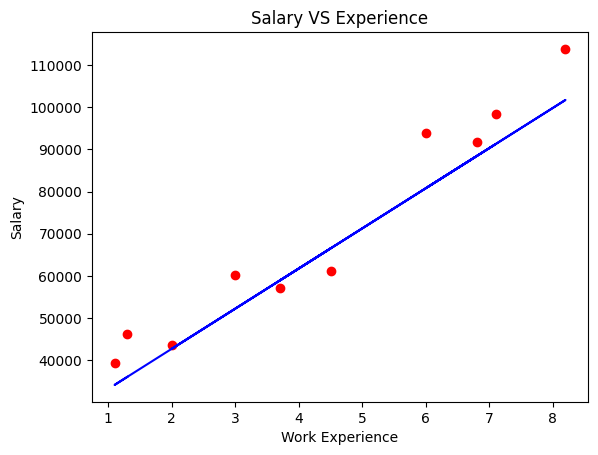

In [ ]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_test,test_data_prediction,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary VS Experience')
plt.show()